In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

In [11]:
h=.02

names = ["Multinomial", "Gaussian", "Bernoulli", "Complement"]

classifiers = [MultinomialNB(), GaussianNB(), BernoulliNB(), ComplementNB()]

X,y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                         random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2*rng.uniform(size=X.shape)
linearly_separable = (X,y)

In [20]:
datasets = [make_moons(noise=0.3, random_state=0),
                      make_circles(noise=0.2, factor=0.5, random_state=1),
                       linearly_separable]

figure = plt.figure(figsize=(6,9))
i=1

<Figure size 600x900 with 0 Axes>

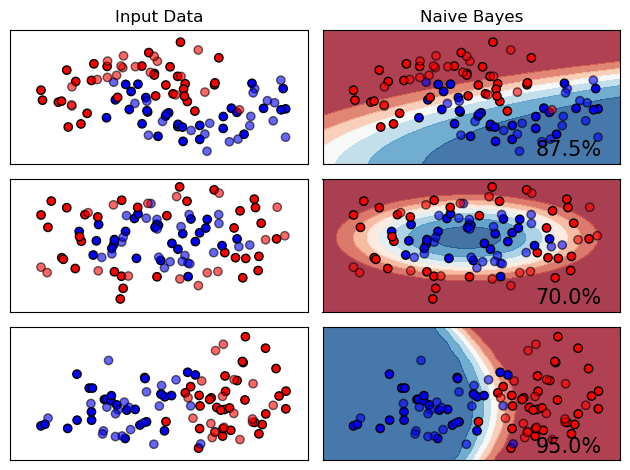

In [21]:
for ds_index, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    x1_min, x1_max = X[:, 0].min()- .5, X[:, 0].max()+.5
    x2_min, x2_max = X[:, 1].min()-.5, X[:, 1].max()+.5
    array1, array2 = np.meshgrid(np.arange(x1_min,x1_max,0.2), np.arange(x2_min,x2_max,0.2))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), 2, i)
    
    if ds_index == 0:
        ax.set_title("Input Data")
    ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(array1.min(),array1.max())
    ax.set_ylim(array2.min(),array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    ax = plt.subplot(len(datasets),2,i)
    
    clf = GaussianNB().fit(x_train,y_train)
    score = clf.score(x_test, y_test)
    
    Z = clf.predict_proba(np.c_[array1.ravel(), array2.ravel()])[:, 1]
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    
    ax.set_xlim(array1.min(),array1.max())
    ax.set_ylim(array2.min(),array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    if ds_index==0:
        ax.set_title("Naive Bayes")
    
    ax.text(array1.max()-.3, array2.min()+.3, ('{:.1f}%'.format(score*100)), size=15, horizontalalignment='right')
    i+=1

plt.tight_layout()
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from time import time
import datetime

In [27]:
def plot_learning_curve(estimator, title, X , y,
                                ax,
                                ylim=None,
                                cv=None,
                                n_jobs=None
                                ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                                          ,cv=cv, n_jobs=n_jobs)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.plot(train_sizes,np.mean(train_scores,axis=1), 'o-'
                                        , color='r', label="Training Score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
                                         , color='g', label="Test Score")
    
    ax.legend(loc="best")
    return ax

In [29]:
digits = load_digits()
X, y = digits.data, digits.target

X.shape

X

title = ["Naive Bayes", "DecisionTree", "SVM RBF kernal", "RandomForest", "Logistic"]
model = [GaussianNB(), DTC(), SVC(gamma=0.001)
             , RFC(n_estimators=50), LR(C=.1, solver="lbfgs")]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

Naive Bayes:00:00:1970-01-01
DecisionTree:00:01:1970-01-01
SVM RBF kernal:00:06:1970-01-01
RandomForest:00:09:1970-01-01
Logistic:00:04:1970-01-01


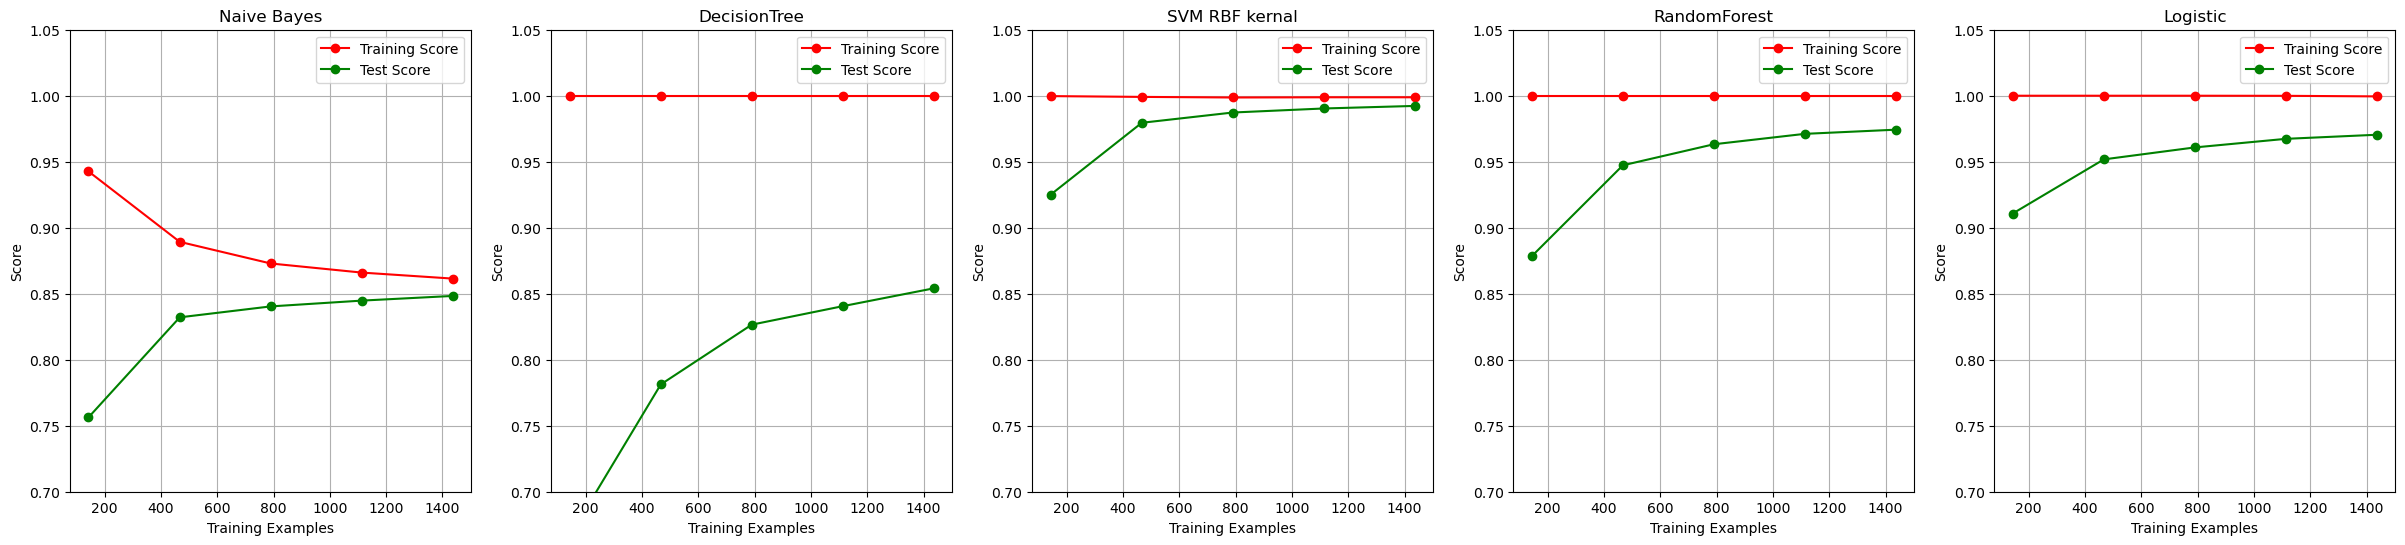

In [31]:
fig, axes = plt.subplots(1,5,figsize=(30,6))
for ind, title_, estimator in zip(range(len(title)), title, model):
    times = time()
    plot_learning_curve(estimator, title_, X, y, 
                               ax=axes[ind], ylim=[0.7,1.05], n_jobs=4, cv=cv)
    print("{}:{}".format(title_, datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%F")))
plt.show()

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [8]:
digits = load_digits()
X,y = digits.data, digits.target
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)
gnb = GaussianNB().fit(Xtrain,Ytrain)
prob = gnb.predict_proba(Xtest)

In [10]:
from sklearn.metrics import brier_score_loss
brier_score_loss(Ytest, prob[:,8], pos_label=8)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR

ValueError: Only binary classification is supported. The type of the target is multiclass.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split

In [2]:
X,y = mc(n_samples=100000, n_features=20
             ,n_classes=2
             ,n_informative=2
             ,n_redundant=10
             ,random_state=42)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.99, random_state=42)

Xtrain
np.unique(Ytrain)

array([0, 1])

In [3]:
gnb = GaussianNB()
gnb.fit(Xtrain,Ytrain)
y_pred = gnb.predict(Xtest)
prob_pos = gnb.predict_proba(Xtest)[:,1]
clf_score = gnb.score(Xtest,Ytest)

In [4]:
df = pd.DataFrame({"ytrue":Ytest[:500], "probability":prob_pos[:500]})
df

,ytrue,probability
0,1,9.999997e-01
1,0,9.999964e-01
2,1,1.000000e+00
3,1,9.886612e-01
4,0,8.441773e-18
...,...,...
495,0,9.224911e-04
496,1,9.931903e-01
497,0,5.670253e-06
498,0,8.248345e-08


In [5]:
df = df.sort_values(by="probability")
df.index = range(df.shape[0])
df

,ytrue,probability
0,0,1.824809e-21
1,0,6.610435e-21
2,0,4.171566e-19
3,0,8.441773e-18
4,0,1.463199e-17
...,...,...
495,1,1.000000e+00
496,1,1.000000e+00
497,1,1.000000e+00
498,1,1.000000e+00


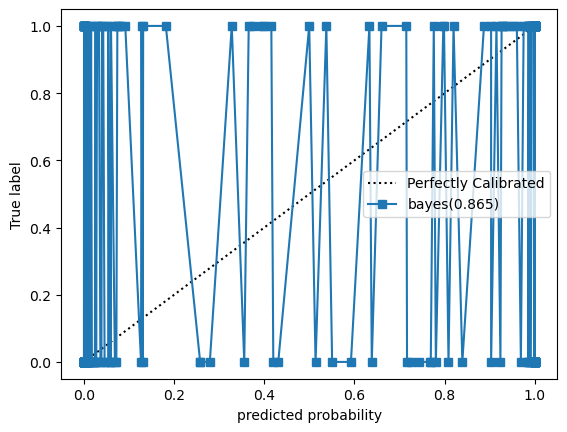

In [6]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0,1],[0,1],"k:",label="Perfectly Calibrated")
ax1.plot(df["probability"],df["ytrue"],"s-", label="%s(%1.3f)"%("bayes",clf_score))
ax1.set_ylabel("True label")
ax1.set_xlabel("predicted probability")
ax1.set_xlim([-0.05,1.05])
ax1.legend()
plt.show()

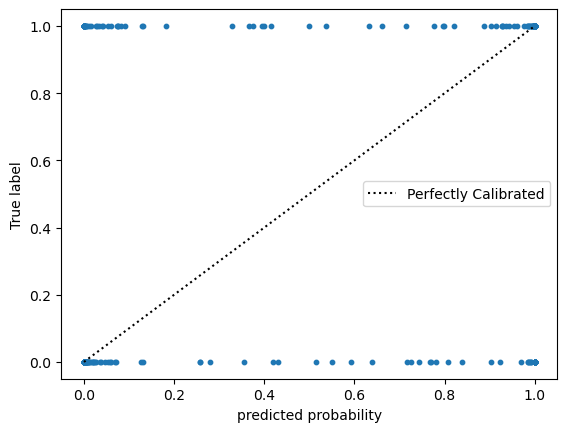

In [7]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0,1],[0,1],"k:",label="Perfectly Calibrated")
ax1.scatter(df["probability"],df["ytrue"], s=10)
ax1.set_ylabel("True label")
ax1.set_xlabel("predicted probability")
ax1.set_xlim([-0.05,1.05])
ax1.legend()
plt.show()

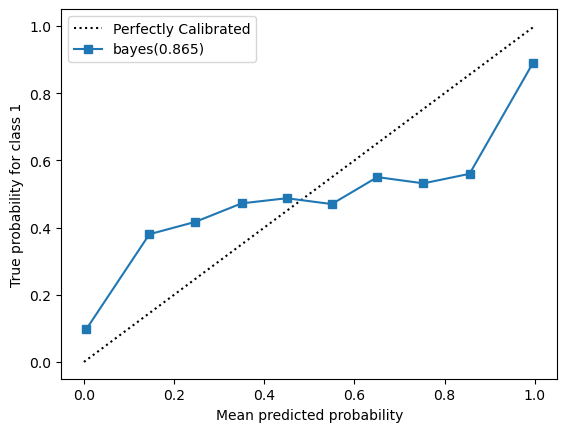

In [6]:
from sklearn.calibration import calibration_curve

trueproba,preproba = calibration_curve(Ytest, prob_pos, n_bins=10)

fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0,1],[0,1],"k:",label="Perfectly Calibrated")
ax1.plot(preproba,trueproba,"s-", label="%s(%1.3f)"%("bayes",clf_score))
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predicted probability")
ax1.set_xlim([-0.05,1.05])
ax1.legend()
plt.show()

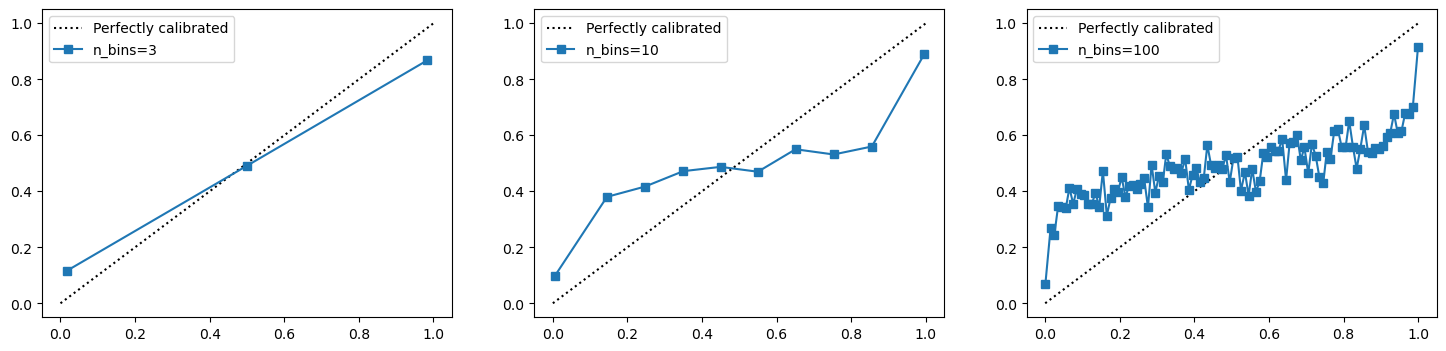

In [9]:
fig, axes = plt.subplots(1,3,figsize=(18,4))
for ind,i in enumerate ([3,10,100]):
    ax = axes[ind]
    ax.plot([0,1],[0,1],"k:",label="Perfectly calibrated")
    trueproba,preproba = calibration_curve(Ytest, prob_pos, n_bins=i)
    ax.plot(preproba,trueproba,"s-", label="n_bins={}".format(i))
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predicted probability")
    ax1.set_xlim([-0.05,1.05])
    ax.legend()
plt.show()

In [10]:
name = ["GaussianBayes","Logistic","SVC"]

gnb = GaussianNB()
logi = LR(C=1., solver='lbfgs', max_iter=3000, multi_class="auto")
svc = SVC(kernel="linear", gamma=1)

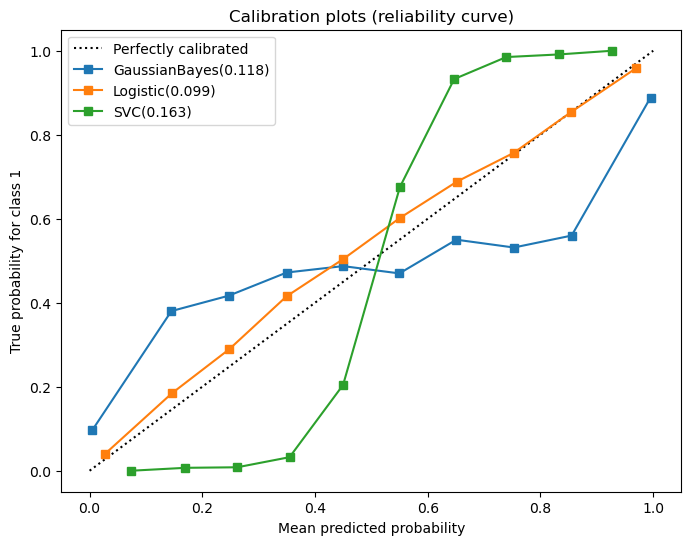

In [11]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot([0,1],[0,1],"k:",label="Perfectly calibrated")
for clf,name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos-prob_pos.min())/(prob_pos.max()-prob_pos.min())
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    trueproba,preproba = calibration_curve(Ytest, prob_pos, n_bins=10)
    ax1.plot(preproba,trueproba,"s-", label="%s(%1.3f)"%(name_,clf_score))
    
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predicted probability")
ax1.set_xlim([-0.05,1.05])
ax1.legend()
ax1.set_title('Calibration plots (reliability curve)')
plt.show()

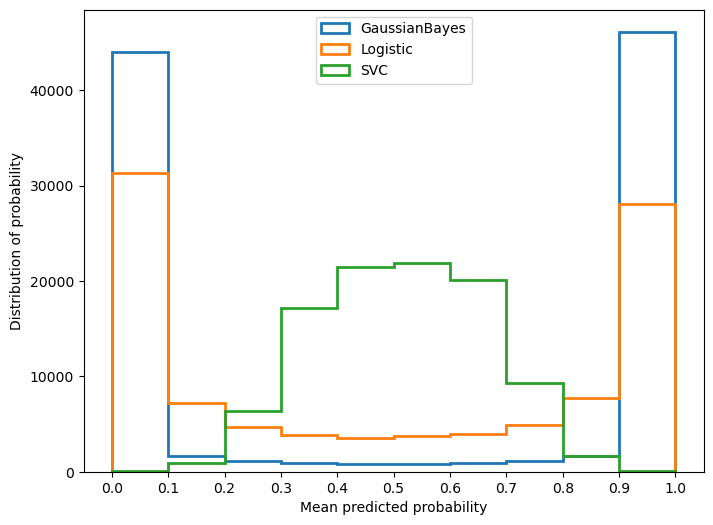

In [12]:
fig,ax2 = plt.subplots(figsize=(8,6))

for clf,name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf,"predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos-prob_pos.min())/(prob_pos.max()-prob_pos.min())
    ax2.hist(prob_pos
                ,bins=10
                ,label=name_
                ,histtype="step"
                ,lw=2)

ax2.set_ylabel("Distribution of probability")
ax2.set_xlabel("Mean predicted probability")
ax2.set_xlim([-0.05,1.05])
ax2.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax2.legend(loc=9)
plt.show()

In [8]:
def plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest,n_bins=10):
    
    import matplotlib.pyplot as plt
    from sklearn.metrics import brier_score_loss
    from sklearn.calibration import calibration_curve
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    ax1.plot([0,1],[0,1],"k:",label="Perfectly Calibrated")
    
    for clf, name_ in zip(models,name):
        clf.fit(Xtrain,Ytrain)
        y_pred = clf.predict(Xtest)
        #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(Xtest)[:,1]
        else:  # use decision function
            prob_pos = clf.decision_function(Xtest)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        #返回布里尔分数
        clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
        trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=n_bins)
        ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
        ax2.hist(prob_pos, range=(0, 1), bins=n_bins, label=name_,histtype="step",lw=2)

    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05,1.05])
    ax2.legend(loc=9)
    ax2.set_title("Distribution of probability")
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predicted probability")
    ax1.set_xlim([-0.05,1.05])
    ax1.legend()
    ax1.set_title("Calibration plots(reliability curve)")
    plt.show()

In [7]:
from sklearn.calibration import CalibratedClassifierCV

name = ["GaussianBayes", "Logistic", "Bayes+isotonic", "Bayes+sigmoid"]

gnb=GaussianNB()

models = [gnb
              ,LR(C=1., solver='lbfgs', max_iter=3000, multi_class="auto")
              #定义两种校准方式
              ,CalibratedClassifierCV(gnb, cv=2, method='isotonic')
              ,CalibratedClassifierCV(gnb, cv=2, method='sigmoid')]

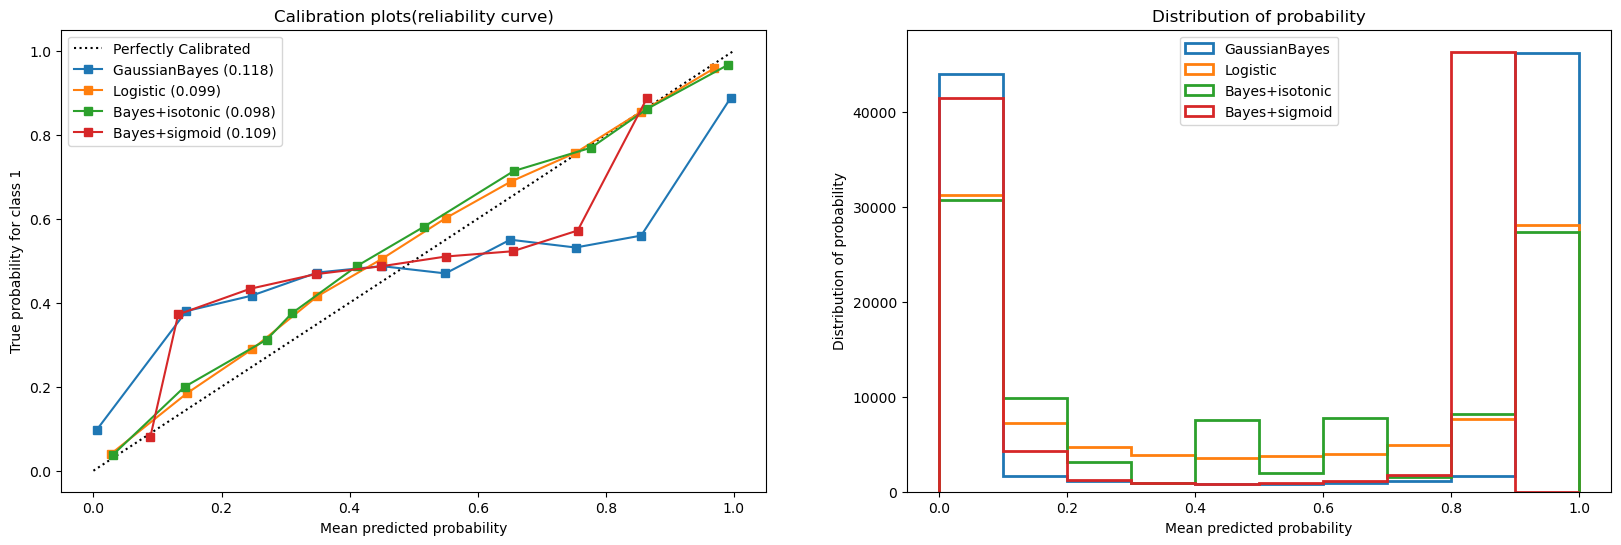

In [17]:
plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest)

In [18]:
gnb = GaussianNB().fit(Xtrain,Ytrain)
gnb.score(Xtest,Ytest)

brier_score_loss(Ytest, gnb.predict_proba(Xtest)[:,1], pos_label=1)


0.11760826355000836

In [19]:
gnbisotonic = CalibratedClassifierCV(gnb, cv=2, method='isotonic').fit(Xtrain,Ytrain)
gnbisotonic.score(Xtest,Ytest)

brier_score_loss(Ytest, gnbisotonic.predict_proba(Xtest)[:,1], pos_label=1)

0.09833190251353853

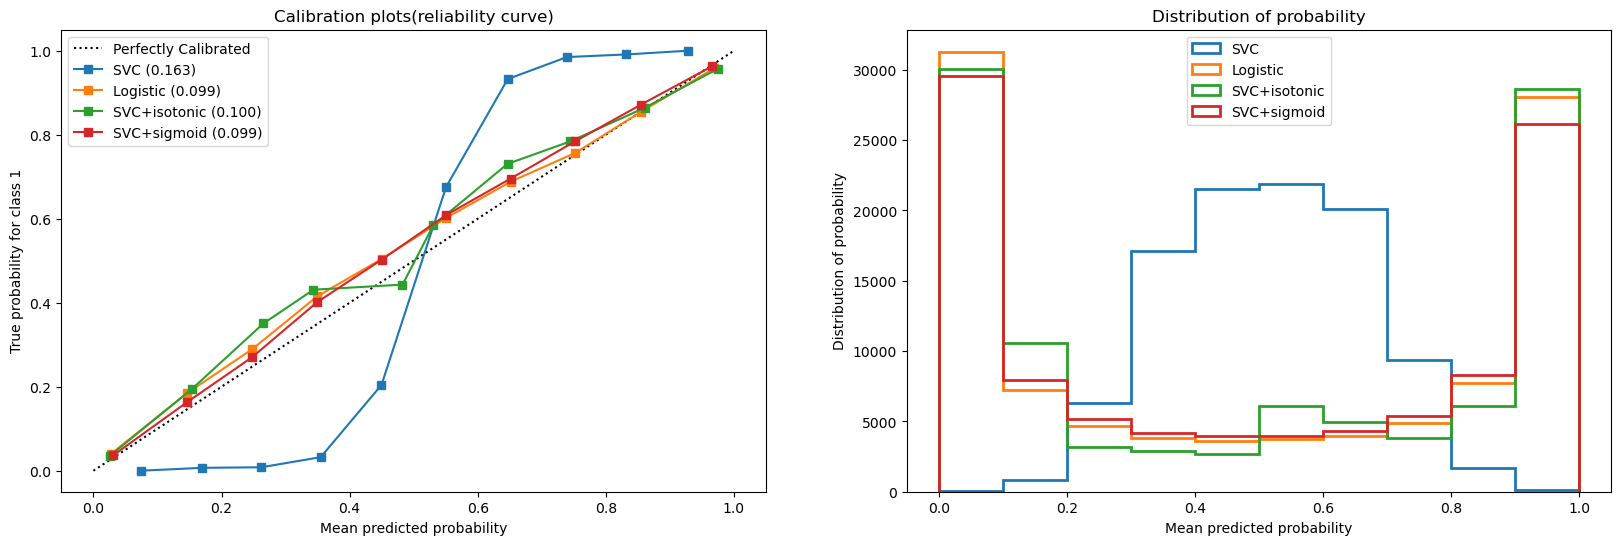

In [10]:
name_SVC = ["SVC","Logistic","SVC+isotonic","SVC+sigmoid"]
svc = SVC(kernel="linear",gamma=1)
models_svc = [svc
                    ,LR(C=1., solver='lbfgs', max_iter=3000, multi_class="auto")
                    ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
                    ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]
plot_calib(models_svc, name_SVC, Xtrain, Xtest, Ytrain, Ytest)

In [13]:
name_SVC = ["SVC","SVC+isotonic","SVC+sigmoid"]
svc = SVC(kernel="linear",gamma=1)
models_svc = [svc
                    ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
                    ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]

for clf,name in zip(models_svc,name_SVC):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    
    clf_score = brier_score_loss(Ytest,prob_pos,pos_label=y.max())
    score = clf.score(Xtest,Ytest)
    print("{}:".format(name))
    print("\tBrier:{:.4f}".format(clf_score))
    print("\taccruancy:{:.4f}".format(score))

SVC:
	Brier:0.1630
	accruancy:0.8633
SVC+isotonic:
	Brier:0.0999
	accruancy:0.8639
SVC+sigmoid:
	Brier:0.0987
	accruancy:0.8634


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss

In [17]:
class_1 = 500
class_2 = 500
centers = [[0.0,0.0,],[2.0,2.0]]
clusters_std = [0.5,0.5]

X,y = make_blobs(n_samples=[class_1,class_2]
                        ,centers=centers
                        ,cluster_std=clusters_std
                        ,random_state=0, shuffle=False)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y, test_size=0.3, random_state=420)

In [19]:
#归一化
mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [30]:
mnb = MultinomialNB().fit(Xtrain_,Ytrain)

mnb.class_log_prior_
np.unique(Ytrain)
(Ytrain==1).sum()/Ytrain.shape[0]
mnb.class_log_prior_.shape

np.exp(mnb.class_log_prior_)

mnb.feature_log_prob_

mnb.feature_log_prob_.shape

mnb.class_count_

mnb.class_count_.shape

(2,)

In [34]:
mnb.predict(Xtest_)
mnb.predict_proba(Xtest_)
mnb.score(Xtest_,Ytest)
brier_score_loss(Ytest,mnb.predict_proba(Xtest_)[:,1],pos_label=1)

0.24977828412546035

In [36]:
from sklearn.preprocessing import KBinsDiscretizer
kbs = KBinsDiscretizer(n_bins=10,encode='onehot').fit(Xtrain)
Xtrain_ = kbs.transform(Xtrain)
Xtest_ = kbs.transform(Xtest)
mnb = MultinomialNB().fit(Xtrain_,Ytrain)
mnb.score(Xtest_,Ytest)
brier_score_loss(Ytest,mnb.predict_proba(Xtest_)[:,1],pos_label=1)

0.0014593932778211862

In [41]:
from sklearn.naive_bayes import BernoulliNB

mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

bnl_ = BernoulliNB().fit(Xtrain,Ytrain)
bnl_.score(Xtest_,Ytest)
brier_score_loss(Ytest,bnl_.predict_proba(Xtest_)[:,1],pos_label=1)

bnl = BernoulliNB(binarize=0.5).fit(Xtrain_,Ytrain)
bnl.score(Xtest_,Ytest)
brier_score_loss(Ytest,bnl.predict_proba(Xtest_)[:,1],pos_label=1)

0.010405875827339534

In [45]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss as BS, recall_score, roc_auc_score as AUC

class_1 = 50000#多数类 50000
class_2 =500#少数类 500
centers = [[0.0,0.0],[5.0,5.0]]
clusters_std = [3,1]
X,y =make_blobs(n_samples=[class_1,class_2]
                       ,centers=centers
                       ,cluster_std = clusters_std
                       ,random_state=0,shuffle=False)
X.shape
np.unique(y)

array([0, 1])

In [48]:
name = ["Multinomial","Gaussian","Bernoulli"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB()]

for name,clf in zip(name,models):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)    
    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins=10,encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)
    
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest, Ytest)
    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987


In [51]:
from sklearn.naive_bayes import ComplementNB
from time import time
import datetime
    
name = ["Multinomial","Gaussian","Bernoulli","Complement"]
models =[MultinomialNB(), GaussianNB(), BernoulliNB(), ComplementNB()]
for name, clf in zip(name,models):
    times = time()
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y, test_size=0.3, random_state=420)
        
        #预处理
    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)
    
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest)
    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
                        

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
00:00:031007
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
00:00:019004
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987
00:00:028006
Complement
	Brier:0.038
	Accuracy:0.953
	Recall:0.987
	AUC:0.991
00:00:027006


In [3]:
sample = ["Machine learning is fascinating, it is wonderful"
              ,"Machine learning is a sensational techonology"
              ,"Elsa is a popular character"]

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()

X = vec.fit_transform(sample)

X

import pandas as pd
CVresult = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
CVresult

,character,elsa,fascinating,is,it,learning,machine,popular,sensational,techonology,wonderful
0,0,0,1,2,1,1,1,0,0,0,1
1,0,0,0,1,0,1,1,0,1,1,0
2,1,1,0,1,0,0,0,1,0,0,0


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF
vec = TFIDF()

X = vec.fit_transform(sample)

X

TFIDFresult = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
TFIDFresult

CVresult.sum(axis=0)/CVresult.sum(axis=0).sum()
TFIDFresult.sum(axis=0)/TFIDFresult.sum(axis=0).sum()

character      0.083071
elsa           0.083071
fascinating    0.064516
is             0.173225
it             0.064516
learning       0.110815
machine        0.110815
popular        0.083071
sensational    0.081192
techonology    0.081192
wonderful      0.064516
dtype: float64

In [12]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups

data.target_names

AttributeError: 'function' object has no attribute 'target_names'

In [14]:
import pandas as pd
import numpy as np

categories = ["sci.space"
                    ,"rec.sport.hockey"
                    ,"talk.politics.guns"
                    ,"talk.politics.mideast"]

train = fetch_20newsgroups(subset="train", categories = categories)
test = fetch_20newsgroups(subset="test", categories = categories)

train

{'data': ["From: tvartiai@vipunen.hut.fi (Tommi Vartiainen)\nSubject: Re: Finland/Sweden vs.NHL teams (WAS:Helsinki/Stockholm & NHL expansion)\nNntp-Posting-Host: vipunen.hut.fi\nOrganization: Helsinki University of Technology, Finland\nLines: 51\n\nIn <1993Apr16.195754.5476@ousrvr.oulu.fi> mep@phoenix.oulu.fi (Marko Poutiainen) writes:\n\n>: FINLAND:  \n>: \n>: D-Jyrki Lumme.......20\n>: D-Teppo Numminen....20\n>: D-Peter Ahola.......13\n>: \n>Well well, they don't like our defenders (mainly Lumme and Numminen)...\n\nAbout 25 is correct for Numminen and Lumme.\n\n\n>: R-Teemu Selanne.....27\n>: \n>Compared to Kurri, Selanne's points are too high, lets make it 25 or 26.\n\nNo, Kurri's points are too low. 27 for Kurri and 28 for Sel{nne.\n\n>: well in the Canada Cup and World Championships largely due to the efforts of\n>: Markus Ketterer (the goalie), 3-4 or the players listed above and luck. There's\n>: presumably a lot of decent players in Finland that wouldn't be superstars at\n>: t

In [20]:
train.target_names
len(train.data)
train.data[0]
np.unique(train.target)
len(train.target)
for i in [1,2,3]:
    print(i,(train.target == i).sum()/len(train.target))

1 0.25749023013460703
2 0.23708206686930092
3 0.24489795918367346


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

Xtrain = train.data
Xtest = test.data
Ytrain = train.target
Ytest = test.target

tfidf = TFIDF().fit(Xtrain)
Xtrain_ = tfidf.transform(Xtrain)
Xtest_ = tfidf.transform(Xtest)
Ytest_ = Ytest.copy()
Ytest_ = pd.get_dummies(Ytest_)

Xtrain_

tosee = pd.DataFrame(Xtrain_.toarray(), columns=tfidf.get_feature_names_out())
tosee.head()
tosee.shape

(2303, 40725)

In [32]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import brier_score_loss as BS
name = ["Multinomial","Complement","Bournulli"]
#注意高斯朴素贝叶斯不接受稀疏矩阵
models = [MultinomialNB(),ComplementNB(),BernoulliNB()]
for name,clf in zip(name,models):
    clf.fit(Xtrain_,Ytrain)
    y_pred = clf.predict(Xtest_)
    proba = clf.predict_proba(Xtest_)
    score = clf.score(Xtest_,Ytest)
    print(name)
    
    #4个不同的标签取值下的布里尔分数
    Bscore = []
    for i in range(len(np.unique(Ytrain))):
        bs = BS(Ytest_[i],proba[:,i],pos_label=i)
        Bscore.append(bs)
        print("\tBrier under {}:{:.3f}".format(train.target_names[i],bs))
        
    print("\tAverage Brier:{:.3f}".format(np.mean(Bscore)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\n")

Multinomial
	Brier under rec.sport.hockey:0.857
	Brier under sci.space:0.033
	Brier under talk.politics.guns:0.169
	Brier under talk.politics.mideast:0.178
	Average Brier:0.309
	Accuracy:0.975


Complement
	Brier under rec.sport.hockey:0.804
	Brier under sci.space:0.039
	Brier under talk.politics.guns:0.137
	Brier under talk.politics.mideast:0.160
	Average Brier:0.285
	Accuracy:0.986


Bournulli
	Brier under rec.sport.hockey:0.925
	Brier under sci.space:0.025
	Brier under talk.politics.guns:0.205
	Brier under talk.politics.mideast:0.193
	Average Brier:0.337
	Accuracy:0.902




In [34]:
from sklearn.calibration import CalibratedClassifierCV

name = ["Multinomial"
            ,"Multinomial + Isotonic"
            ,"Multinomial + Sigmoid"
            ,"Complement"
            ,"Complement + Isotonic"
            ,"Complement + Sigmoid"
            ,"Bernoulli"
            ,"Bernoulli + Isotonic"
            ,"Bernoulli + Sigmoid"]

models = [MultinomialNB()
         ,CalibratedClassifierCV(MultinomialNB(), cv=2, method='isotonic')
         ,CalibratedClassifierCV(MultinomialNB(), cv=2, method='sigmoid')
         ,ComplementNB()
         ,CalibratedClassifierCV(ComplementNB(), cv=2, method='isotonic')
         ,CalibratedClassifierCV(ComplementNB(), cv=2, method='sigmoid')
         ,BernoulliNB()
         ,CalibratedClassifierCV(BernoulliNB(), cv=2, method='isotonic')
         ,CalibratedClassifierCV(BernoulliNB(), cv=2, method='sigmoid')
         ]

for name, clf in zip(name,models):
    clf.fit(Xtrain_,Ytrain)
    y_pred = clf.predict(Xtest_)
    proba = clf.predict_proba(Xtest_)
    score = clf.score(Xtest_,Ytest)
    print(name)
    Bscore = []
    for i in range(len(np.unique(Ytrain))):
        bs = BS(Ytest_[i],proba[:,i],pos_label=i)
        Bscore.append(bs)
        print("\tBrier under {}:{:.3f}".format(train.target_names[i],bs))
    print("\tAverage Brier:{:.3f}".format(np.mean(Bscore)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\n")

Multinomial
	Brier under rec.sport.hockey:0.857
	Brier under sci.space:0.033
	Brier under talk.politics.guns:0.169
	Brier under talk.politics.mideast:0.178
	Average Brier:0.309
	Accuracy:0.975


Multinomial + Isotonic
	Brier under rec.sport.hockey:0.980
	Brier under sci.space:0.012
	Brier under talk.politics.guns:0.226
	Brier under talk.politics.mideast:0.228
	Average Brier:0.362
	Accuracy:0.973


Multinomial + Sigmoid
	Brier under rec.sport.hockey:0.968
	Brier under sci.space:0.012
	Brier under talk.politics.guns:0.219
	Brier under talk.politics.mideast:0.222
	Average Brier:0.355
	Accuracy:0.973


Complement
	Brier under rec.sport.hockey:0.804
	Brier under sci.space:0.039
	Brier under talk.politics.guns:0.137
	Brier under talk.politics.mideast:0.160
	Average Brier:0.285
	Accuracy:0.986


Complement + Isotonic
	Brier under rec.sport.hockey:0.984
	Brier under sci.space:0.007
	Brier under talk.politics.guns:0.227
	Brier under talk.politics.mideast:0.230
	Average Brier:0.362
	Accuracy:0.9